In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output
from IPython.display import Image
import pickle
import logging
import time
import random
from enum import Enum

In [2]:
data = pd.read_csv("C:/Users/cmira/Desktop/FYSSTK/Summary of Weather.csv", delimiter=',', low_memory=False)
data.fillna(0,inplace=True)
data = data.sample(frac=1)
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
73301,32801,1943-12-19,0,0.0,26.111111,9.444444,17.777778,0,0,43,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
13938,10803,1942-5-26,T,0.0,30.000000,23.888889,26.666667,0,1,42,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
50400,20501,1943-11-11,0,0.0,31.111111,24.444444,27.777778,0,0,43,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
45689,16405,1942-10-26,0.508,0.0,1.666667,-1.666667,0.000000,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
55051,22504,1941-7-5,0,0.0,28.888889,23.333333,26.111111,0,0,41,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,...,119040.0,119040.0,119040.0,119040.0,119040.000000,119040.0,119040.0,119040.0,119040.0,119040.0
mean,29659.435795,0.168818,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,0.120884,0.091154,...,0.0,0.0,0.0,0.0,0.053300,0.0,0.0,0.0,0.0,0.0
std,20953.209402,2.611819,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,2.069915,1.410269,...,0.0,0.0,0.0,0.0,0.886512,0.0,0.0,0.0,0.0,0.0
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11801.000000,0.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,33501.000000,0.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,0.0,0.0,0.0,0.0,23.900000,0.0,0.0,0.0,0.0,0.0


In [4]:
columns = ['MaxTemp','MinTemp']
filteredColumns = data[columns]
filteredColumns.describe()

,MaxTemp,MinTemp
count,119040.000000,119040.000000
mean,27.045111,17.789511
std,8.717817,8.334572
min,-33.333333,-38.333333
25%,25.555556,15.000000
50%,29.444444,21.111111
75%,31.666667,23.333333
max,50.000000,34.444444


Text(0, 0.5, 'MaxTemp')

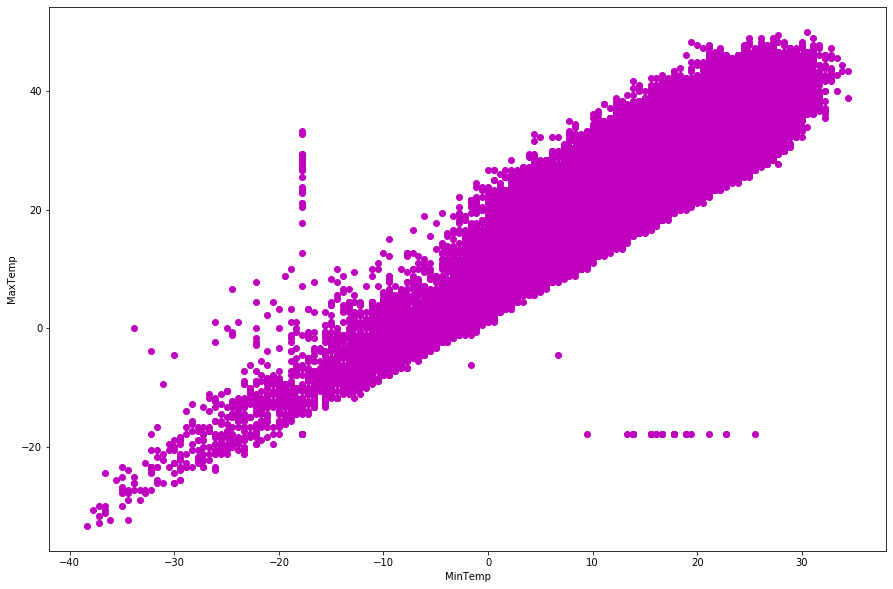

In [5]:
plt.figure(figsize=(15,10))
x = filteredColumns['MinTemp']
y = filteredColumns['MaxTemp']
plt.plot(x,y,'mo')
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")

In [6]:
# Calculate mean squared error
def mean_squared_error(actual_values, predicted_values):
    sum_value = .0
    for i in range(len(actual_values)):
        sum_value += ((predicted_values[i] - actual_values[i]) ** 2)
        
    return sum_value/float(len(actual_values))

In [7]:
# calculate the gradient of one step
def step_gradient(x,y,b_current=0,m_current=0,learning_rate=.0001):
    N = float(len(x))
    m_gradient = 0
    b_gradient = 0
    for i in range(len(x)):
        b_gradient += -(2/N) * (y[i] - (m_current * x[i] + b_current))
        m_gradient += -(2/N) * x[i] * (y[i] - (m_current * x[i] + b_current))
    b_next = b_current - (learning_rate * b_gradient)
    m_next = m_current - (learning_rate * m_gradient)
    return b_next , m_next

In [8]:
# function to delete then print in a jupyter notebook
def only_print(text):
    clear_output()
    print(text)

# enumeartion for types of gradient descent
class GradientDescentTypes(Enum):
    Batch = 1
    Stochastic = 2
    MiniBatch = 3
    
# get a sample of the data
def get_sample(x,y,size,shuffle=False):
    if shuffle:
        c = list(zip(x, y))
        random.shuffle(c)
        x, y = zip(*c)
    
    x = pd.Series(list(x))
    y = pd.Series(list(y))
    
    x = x.iloc[:size]
    y = y.iloc[:size]
    
    x.index = range(size)
    y.index = range(size)
    
    return x, y
    
# function to run gradient descent for n iterations
def gradient_descent_runner(x,y,b_start=0,m_start=0,learning_rate=.0001,num_iteration=1000, 
                            learning_method=GradientDescentTypes.Batch, batch_size=256):
    b_now = b_start
    m_now = m_start
    mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
    predictions = [[b_now,m_now,mse]]
    if(learning_method is GradientDescentTypes.Batch):
        for i in range(num_iteration):
            b_now, m_now = step_gradient(x,y,b_now,m_now,learning_rate)
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions.append([b_now,m_now,mse])
            only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
            logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
        return predictions
        
    elif(learning_method is GradientDescentTypes.Stochastic):
        for i in range(num_iteration):
            shuffle_x, shuffle_y = get_sample(x,y,1,shuffle=True)
            b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions.append([b_now,m_now,mse])
            only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
            logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
        return predictions
        
    elif(learning_method is GradientDescentTypes.MiniBatch):
        for i in range(num_iteration):
            shuffle_x, shuffle_y = get_sample(x,y,batch_size,shuffle=True)
            b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions.append([b_now,m_now,mse])
            only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
            logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
        return predictions
    else:
        return []

In [9]:
# function for splitting the data into training and testing
def split_data(x,train_split_rate = .5):
    train_x = x.iloc[:int(round(len(x)*train_split_rate))]
    test_x = x.iloc[int(round(len(x)*train_split_rate)):]
    
    train_x.index = range(len(train_x))
    test_x.index = range(len(test_x))
    
    return train_x, test_x

In [10]:
# hyperparameters
epochs = 100
b_start = 0
m_start = 0
learning_rate = .0005

In [11]:
# splitting the data
train_data, test_data = split_data(data,train_split_rate=.5)
train_x, test_x = train_data['MinTemp'], test_data['MinTemp']
train_y, test_y = train_data['MaxTemp'], test_data['MaxTemp']
train_x

0         9.444444
1        23.888889
2        24.444444
3        -1.666667
4        23.333333
           ...    
59515    20.000000
59516    21.111111
59517    22.222222
59518    25.000000
59519    -0.555556
Name: MinTemp, Length: 59520, dtype: float64

In [12]:
def compute_linear_y_values(x,b = 0,m = 0):
    result = b + (m * x)
    return result

In [13]:
predictions = gradient_descent_runner(train_x,train_y,b_start,m_start,learning_rate,epochs)

[b = 0.2530964037419842, m = 1.4004538032473282, mse = 36.7674818525545, iteration = 99]


In [15]:
max_index = int(len(predictions)-1)
last_b, last_m = predictions[max_index][0], predictions[max_index][1]
test_result = compute_linear_y_values(test_x,last_b,last_m)
mse = mean_squared_error(test_y, test_result)
print("Testing MSE = {}".format(mse))

Testing MSE = 37.24763698151232


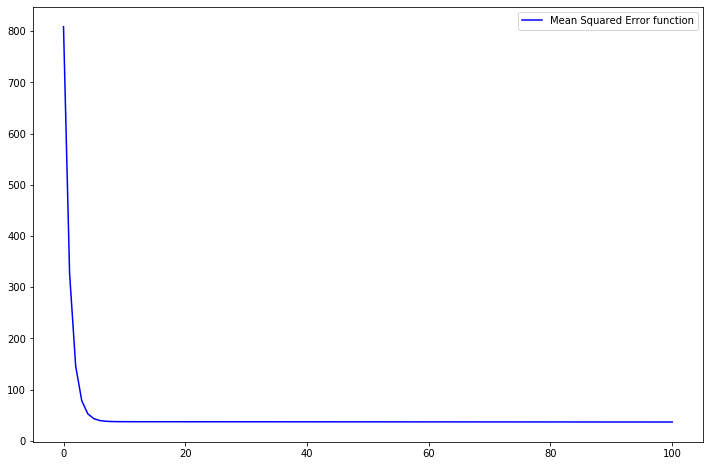

In [16]:
plt.subplots(figsize=(12,8))
x_values = [i for i in range(len(predictions))]
y_values = [m[2] for m in predictions]
plt.plot(x_values, y_values, color = "b", label="Mean Squared Error function")
plt.legend()
plt.show()

In [17]:
# batch gradient descent
start_time = time.time()
predictions_batch = gradient_descent_runner(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                      learning_method=GradientDescentTypes.Batch)
passed_time_batch = time.time() - start_time

# stochastic gradient descent
start_time = time.time()
predictions_stochastic = gradient_descent_runner(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                      learning_method=GradientDescentTypes.Stochastic)
passed_time_stochastic = time.time() - start_time

# mini-batch gradient descent
start_time = time.time()
predictions_miniBatch = gradient_descent_runner(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                      learning_method=GradientDescentTypes.MiniBatch,batch_size=256)
passed_time_miniBatch = time.time() - start_time

[b = 0.2519530767664067, m = 1.4040259703063473, mse = 36.77715041747293, iteration = 99]


In [18]:
print('time passed with batch: {}'.format(passed_time_batch))
print('time passed with stochastic: {}'.format(passed_time_stochastic))
print('time passed with mini-batch: {}'.format(passed_time_miniBatch))

time passed with batch: 1069.179902791977
time passed with stochastic: 352.6879794597626
time passed with mini-batch: 347.31345319747925


[0.2530964037419842, 1.4004538032473282, 36.7674818525545]
[0.2882310045773471, 1.1964572192015244, 52.44200062133266]
[0.2519530767664067, 1.4040259703063473, 36.77715041747293]


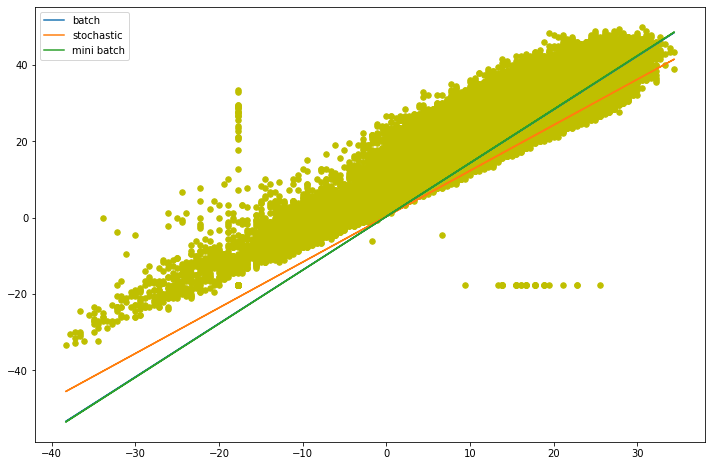

In [32]:
# plot parameters
print(predictions_batch[-1])
print(predictions_stochastic[-1])
print(predictions_miniBatch[-1])

final_gd = predictions_batch[-1]
gd_line = final_gd[0] + final_gd[1] * x 

final_sgd = predictions_stochastic[-1]
sgd_line = final_sgd[0] + final_sgd[1] * x 

final_mbsgd = predictions_miniBatch[-1]
mbsgd_line = final_mbsgd[0] + final_mbsgd[1] * x 

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x,y,color = "y", marker = "o", s = 30)
x_line.index = range(int(len(x_line)))
ln_batch, = ax.plot(x, final_gd[1]*x + final_gd[0], label = "batch")
ln_stochastic, = ax.plot(x, final_sgd[0] + final_sgd[1] * x, label="stochastic")
ln_mini_batch, = ax.plot(x, final_mbsgd[0] + final_mbsgd[1] * x,label="mini batch")

ax.legend()


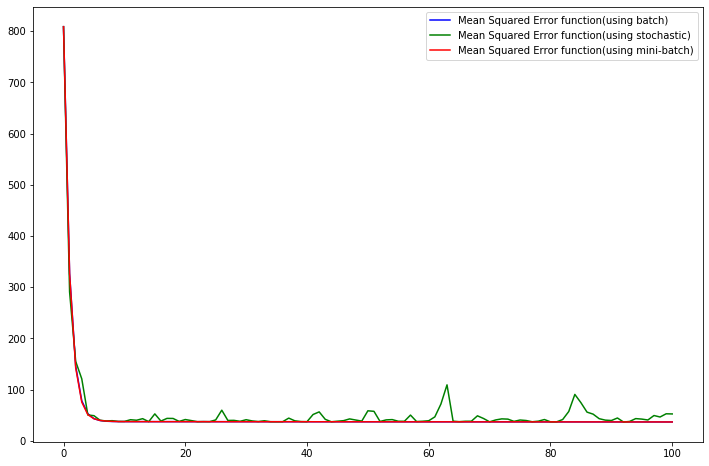

In [33]:
plt.subplots(figsize=(12,8))
x_values = [i for i in range(len(predictions))]
y_values = [m[2] for m in predictions_batch]
plt.plot(x_values, y_values, color = "b", label="Mean Squared Error function(using batch)")
plt.legend()
y_values = [m[2] for m in predictions_stochastic]
plt.plot(x_values, y_values, color = "g", label="Mean Squared Error function(using stochastic)")
plt.legend()
y_values = [m[2] for m in predictions_miniBatch]
plt.plot(x_values, y_values, color = "r", label="Mean Squared Error function(using mini-batch)")
plt.legend()
plt.show()

In [ ]:
# function to run gradient descent for n iterations

lrtrials = [0.0001, 0.0002, 0.001]
dictionary_lr =  {0.0001 : 0, 0.0005:0, 0.001:0, 0.005:0, 0.01:0, 0.05:0, 0.1:0, 0.5:0, 1:0, 5:0, 10:0}
for lr in dictionary_lr.keys():

    def step_gradient2(x,y,b_current=0,m_current=0,learning_rate=lr):
        N = float(len(x))
        m_gradient = 0
        b_gradient = 0
        for i in range(len(x)):
            b_gradient += -(2/N) * (y[i] - (m_current * x[i] + b_current))
            m_gradient += -(2/N) * x[i] * (y[i] - (m_current * x[i] + b_current))
        b_next = b_current - (learning_rate * b_gradient)
        m_next = m_current - (learning_rate * m_gradient)
        return b_next , m_next
    
    def gradient_descent_runner2(x,y,b_start=0,m_start=0,learning_rate=lr,num_iteration=1000, 
                                learning_method=GradientDescentTypes.Batch, batch_size=256):
        b_now = b_start
        m_now = m_start
        mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
        predictions = [[b_now,m_now,mse]]
        if(learning_method is GradientDescentTypes.Batch):
            for i in range(num_iteration):
                b_now, m_now = step_gradient(x,y,b_now,m_now,learning_rate)
                mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
                predictions.append([b_now,m_now,mse])
                only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
            return predictions

        elif(learning_method is GradientDescentTypes.Stochastic):
            for i in range(num_iteration):
                shuffle_x, shuffle_y = get_sample(x,y,1,shuffle=True)
                b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
                mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
                predictions.append([b_now,m_now,mse])
                only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
            return predictions

        elif(learning_method is GradientDescentTypes.MiniBatch):
            for i in range(num_iteration):
                shuffle_x, shuffle_y = get_sample(x,y,batch_size,shuffle=True)
                b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
                mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
                predictions.append([b_now,m_now,mse])
                only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                mse = mse
            return predictions, mse
        else:
            return []

    # mini-batch gradient descent
    predictions_miniBatch2 = gradient_descent_runner2(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                          learning_method=GradientDescentTypes.MiniBatch,batch_size=256)[0]

    x_values = [i for i in range(len(predictions_miniBatch2))]
    y_values = [m[2] for m in predictions_miniBatch2]
    dictionary_lr[lr] = gradient_descent_runner2(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                          learning_method=GradientDescentTypes.MiniBatch,batch_size=256)[1] #wrong index

In [ ]:
dictionary_lr

[b = 0.2586413108070522, m = 1.3978771264000591, mse = 37.071890283856504, iteration = 99]


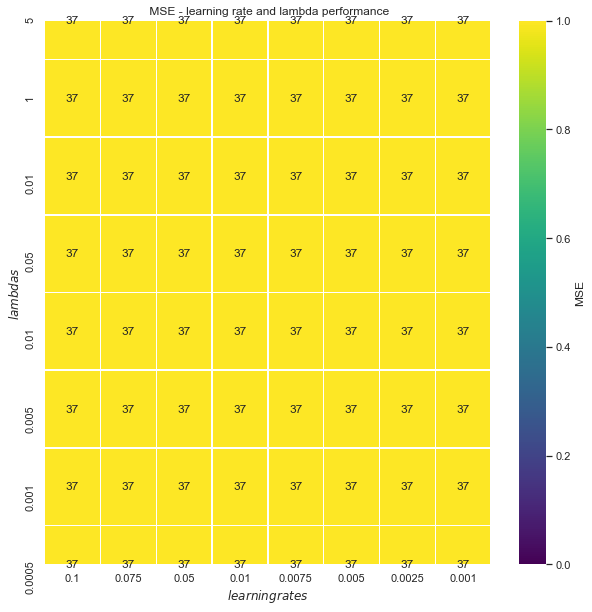

In [25]:
# function to run gradient descent for n iterations


learning_rates = [0.1, 0.075, 0.05, 0.01, 0.0075, 0.005, 0.0025, 0.001]
lambdas = [5, 1, 0.01, 0.05, 0.01, 0.005, 0.001, 0.0005]
mse_d = np.zeros((len(lambdas), len(learning_rates)))

train_data, test_data = split_data(data,train_split_rate=.5)
train_x, test_x = train_data['MinTemp'], test_data['MinTemp']
train_y, test_y = train_data['MaxTemp'], test_data['MaxTemp']

for l in range(len(lambdas)):
    for lr in range(len(learning_rates)):
        lr_curr = learning_rates[lr]
        lb_curr = lambdas[l]

        def step_gradient2(x,y,lb_curr,b_current=0,m_current=0, learning_rate=lr_curr):
            N = float(len(x))
            m_gradient = 0
            b_gradient = 0
            for i in range(len(x)):
                b_gradient += -(2/N) * (y[i] - (m_current * x[i] + b_current))
                m_gradient += -(2/N) * x[i] * (y[i] - (m_current * x[i] + b_current))
            b_next = b_current - (learning_rate * (b_gradient + 2 * lb_curr * b_current))
            m_next = m_current - (learning_rate * (m_gradient + 2 * lb_curr * m_current))
            return b_next , m_next

        def gradient_descent_runner2(x,y,b_start=0,m_start=0,learning_rate=lr,num_iteration=500, 
                                    learning_method=GradientDescentTypes.MiniBatch, batch_size=128):
            b_now = b_start
            m_now = m_start
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions = [[b_now,m_now,mse]]


            if(learning_method is GradientDescentTypes.MiniBatch):
                for i in range(num_iteration):
                    shuffle_x, shuffle_y = get_sample(x,y,batch_size,shuffle=True)
                    b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
                    mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
                    predictions.append([b_now,m_now,mse])
                    only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                    logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                    mse = mse
                return predictions, mse
            else:
                return []

        mse = gradient_descent_runner2(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                              learning_method=GradientDescentTypes.MiniBatch,batch_size=128)[1]    
        mse_d[l][lr] = mse    
        
        
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_d, annot=True, ax=ax, cmap="viridis", xticklabels=learning_rates, cbar_kws={'label': 'MSE'}, yticklabels=lambdas, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" MSE - learning rate and lambda performance")
ax.set_ylabel("$lambdas$")
ax.set_xlabel("$learning rates$")
plt.show()

[b = 0.2587348426130214, m = 1.4027438417420617, mse = 37.07465831114712, iteration = 99]


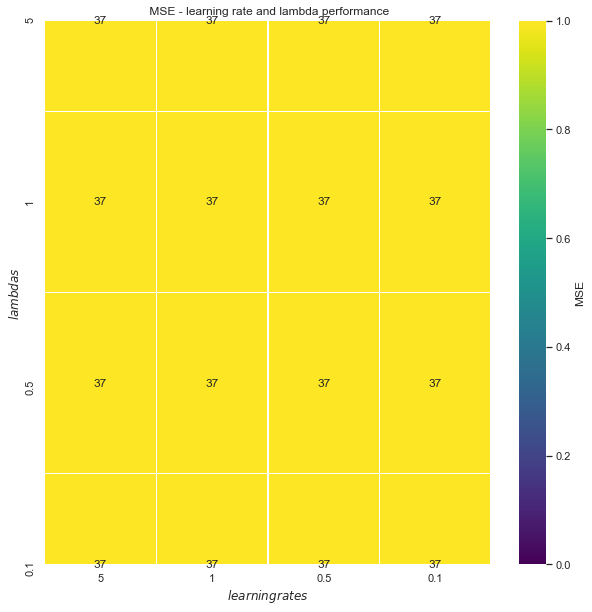

In [26]:
# function to run gradient descent for n iterations


learning_rates = [5, 1, 0.5, 0.1]
lambdas = [5, 1, 0.5, 0.1]
mse_d = np.zeros((len(lambdas), len(learning_rates)))

train_data, test_data = split_data(data,train_split_rate=.5)
train_x, test_x = train_data['MinTemp'], test_data['MinTemp']
train_y, test_y = train_data['MaxTemp'], test_data['MaxTemp']

for l in range(len(lambdas)):
    for lr in range(len(learning_rates)):
        lr_curr = learning_rates[lr]
        lb_curr = lambdas[l]

        def step_gradient2(x,y,lb_curr,b_current=0,m_current=0, learning_rate=lr_curr):
            N = float(len(x))
            m_gradient = 0
            b_gradient = 0
            for i in range(len(x)):
                b_gradient += -(2/N) * (y[i] - (m_current * x[i] + b_current))
                m_gradient += -(2/N) * x[i] * (y[i] - (m_current * x[i] + b_current))
            b_next = b_current - (learning_rate * (b_gradient + 2 * lb_curr * b_current))
            m_next = m_current - (learning_rate * (m_gradient + 2 * lb_curr * m_current))
            return b_next , m_next

        def gradient_descent_runner2(x,y,b_start=0,m_start=0,learning_rate=lr,num_iteration=500, 
                                    learning_method=GradientDescentTypes.MiniBatch, batch_size=128):
            b_now = b_start
            m_now = m_start
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions = [[b_now,m_now,mse]]


            if(learning_method is GradientDescentTypes.MiniBatch):
                for i in range(num_iteration):
                    shuffle_x, shuffle_y = get_sample(x,y,batch_size,shuffle=True)
                    b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
                    mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
                    predictions.append([b_now,m_now,mse])
                    only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                    logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                    mse = mse
                return predictions, mse
            else:
                return []

        mse = gradient_descent_runner2(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                              learning_method=GradientDescentTypes.MiniBatch,batch_size=128)[1]    
        mse_d[l][lr] = mse    
        # mini-batch gradient descent
        
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_d, annot=True, ax=ax, cmap="viridis", xticklabels=learning_rates, cbar_kws={'label': 'MSE'}, yticklabels=lambdas, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" MSE - learning rate and lambda performance")
ax.set_ylabel("$lambdas$")
ax.set_xlabel("$learning rates$")
plt.show()

In [27]:
mse_d

array([[37.12064561, 37.47972464, 37.08040408, 37.13561305],
       [37.08938339, 37.12997339, 37.08778156, 37.10637751],
       [37.17687381, 37.18455551, 37.09085468, 37.08970871],
       [37.10520306, 37.09333092, 37.21864324, 37.07465831]])

In [ ]:
# calculate the gradient of one step
larningrates = [0.00001, 0.00005, 0.0001, 0.005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
lambdas = [0.1, 0.05, 0.01, 0.005, 0.001]
results = pd.DataFrame()



for l in range(len(lambdas)):
    for lr in range(len(learningrates)):
        lr_curr = learningrates[lr]
        lb_curr = lambdas[l]

    def step_gradient3(x,y,b_current=0,m_current=0,learning_rate=lr_curr, lb_curr):
        N = float(len(x))
        m_gradient = 0
        b_gradient = 0
        for i in range(len(x)):
            b_gradient += -(2/N) * (y[i] - (m_current * x[i] + b_current))
            m_gradient += -(2/N) * x[i] * (y[i] - (m_current * x[i] + b_current))
        b_next = b_current - (learning_rate * (b_gradient + 2 * lb_curr * b_current))
        m_next = m_current - (learning_rate * (m_gradient + 2 * lb_curr * m_current))
        return b_next , m_next

    def gradient_descent_runner3(x,y,b_start=0,m_start=0,learning_rate=lr_curr,num_iteration=1000, lb_curr, 
                                    learning_method=GradientDescentTypes.Batch, batch_size=256):
            b_now = b_start
            m_now = m_start
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions = [[b_now,m_now,mse]]
            if(learning_method is GradientDescentTypes.Batch):
                for i in range(num_iteration):
                    b_now, m_now = step_gradient3(x,y,b_now,m_now,learning_rate)
                    mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
                    predictions.append([b_now,m_now,mse])
                    only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                    logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                        
                return predictions

            elif(learning_method is GradientDescentTypes.Stochastic):
                for i in range(num_iteration):
                    shuffle_x, shuffle_y = get_sample(x,y,1,shuffle=True)
                    b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
                    mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
                    predictions.append([b_now,m_now,mse])
                    only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                    logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                return predictions

            elif(learning_method is GradientDescentTypes.MiniBatch):
                for i in range(num_iteration):
                    shuffle_x, shuffle_y = get_sample(x,y,batch_size,shuffle=True)
                    b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate, lb_curr)
                    mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
                    predictions.append([b_now,m_now,mse])
                    only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                    logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
                    mse = mse
                return predictions, mse
            else:
                return []
            
        predictions_miniBatch3 = gradient_descent_runner3(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                          learning_method=GradientDescentTypes.MiniBatch,batch_size=256)[0]

        x_values = [i for i in range(len(predictions_miniBatch3))]
        y_values = [m[2] for m in predictions_miniBatch3]          
        results["Mse: lr = "+str(learningrates[lr])+"lambda = "+str(lambdas[l]) = gradient_descent_runner3(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                          learning_method=GradientDescentTypes.MiniBatch,batch_size=256)[1]]
                              
results